In [71]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
snpeff_df=pd.read_table("BRCA1_exon10_artifical_variant.snpeff.vcf", skiprows=9,header=0,usecols=range(10))

In [4]:
snpeff_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1
1,chr17,41243351,.,A,C,.,.,ANN=C|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1
2,chr17,41243351,.,A,T,.,.,ANN=T|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1
3,chr17,41243351,.,A,AA,.,.,ANN=AA|intron_variant|MODIFIER|BRCA1|BRCA1|tra...,GT,0/1
4,chr17,41243351,.,A,AG,.,.,ANN=AG|intron_variant|MODIFIER|BRCA1|BRCA1|tra...,GT,0/1


In [5]:
info_df=snpeff_df["INFO"].str.replace("ANN=","").str.split(',').apply(pd.Series,1).stack()

In [6]:
info_df.head()

0  0    G|intron_variant|MODIFIER|BRCA1|BRCA1|transcri...
   1    G|intron_variant|MODIFIER|BRCA1|BRCA1|transcri...
   2    G|intron_variant|MODIFIER|BRCA1|BRCA1|transcri...
   3    G|intron_variant|MODIFIER|BRCA1|BRCA1|transcri...
   4    G|intron_variant|MODIFIER|BRCA1|BRCA1|transcri...
dtype: object

In [27]:
detail_info_df=info_df.apply(lambda x: pd.Series(x.split('|')))

In [30]:
detail_info_df.head()

0               1         2      3      4           5            6   \
0 0  G  intron_variant  MODIFIER  BRCA1  BRCA1  transcript  NM_007300.3   
  1  G  intron_variant  MODIFIER  BRCA1  BRCA1  transcript  NM_007298.3   
  2  G  intron_variant  MODIFIER  BRCA1  BRCA1  transcript  NR_027676.1   
  3  G  intron_variant  MODIFIER  BRCA1  BRCA1  transcript  NM_007297.3   
  4  G  intron_variant  MODIFIER  BRCA1  BRCA1  transcript  NM_007299.3   

                 7      8              9  ...  12 13 14 15   16   17   18  \
0 0  protein_coding  10/23  c.4096+101T>C ...               NaN  NaN  NaN   
  1  protein_coding   9/21   c.788-302T>C ...               NaN  NaN  NaN   
  2      pseudogene  10/22  n.4232+101T>C ...               NaN  NaN  NaN   
  3  protein_coding   9/21  c.3955+101T>C ...               NaN  NaN  NaN   
  4  protein_coding  10/21   c.788-302T>C ...               NaN  NaN  NaN   

      19   20   21  
0 0  NaN  NaN  NaN  
  1  NaN  NaN  NaN  
  2  NaN  NaN  NaN  
  3  NaN  NaN  NaN  
  4  NaN  NaN  NaN  

[5 rows x 22 columns]

In [31]:
for i in range(16, 22):
    del detail_info_df[i]

In [34]:
detail_info_df.columns=['Allele','Effect','Putative_impact','Gene_name','Gene_id','Feature_type','Feature_id','Tracscript_biotype','Rank_total','HGVS.c','HGVS.p','cDNA_position','CDS_position','Protein_position','Distance_to_feature','Errors']

In [36]:
detail_info_df.head()

Allele          Effect Putative_impact Gene_name Gene_id Feature_type  \
0 0      G  intron_variant        MODIFIER     BRCA1   BRCA1   transcript   
  1      G  intron_variant        MODIFIER     BRCA1   BRCA1   transcript   
  2      G  intron_variant        MODIFIER     BRCA1   BRCA1   transcript   
  3      G  intron_variant        MODIFIER     BRCA1   BRCA1   transcript   
  4      G  intron_variant        MODIFIER     BRCA1   BRCA1   transcript   

      Feature_id Tracscript_biotype Rank_total         HGVS.c HGVS.p  \
0 0  NM_007300.3     protein_coding      10/23  c.4096+101T>C          
  1  NM_007298.3     protein_coding       9/21   c.788-302T>C          
  2  NR_027676.1         pseudogene      10/22  n.4232+101T>C          
  3  NM_007297.3     protein_coding       9/21  c.3955+101T>C          
  4  NM_007299.3     protein_coding      10/21   c.788-302T>C          

    cDNA_position CDS_position Protein_position Distance_to_feature Errors  
0 0                                                                         
  1                                                                         
  2                                                                         
  3                                                                         
  4

In [37]:
detail_info_df.index=detail_info_df.index.droplevel(-1)
detail_info_df.head()

,Allele,Effect,Putative_impact,Gene_name,Gene_id,Feature_type,Feature_id,Tracscript_biotype,Rank_total,HGVS.c,HGVS.p,cDNA_position,CDS_position,Protein_position,Distance_to_feature,Errors
0,G,intron_variant,MODIFIER,BRCA1,BRCA1,transcript,NM_007300.3,protein_coding,10/23,c.4096+101T>C,,,,,,
0,G,intron_variant,MODIFIER,BRCA1,BRCA1,transcript,NM_007298.3,protein_coding,9/21,c.788-302T>C,,,,,,
0,G,intron_variant,MODIFIER,BRCA1,BRCA1,transcript,NR_027676.1,pseudogene,10/22,n.4232+101T>C,,,,,,
0,G,intron_variant,MODIFIER,BRCA1,BRCA1,transcript,NM_007297.3,protein_coding,9/21,c.3955+101T>C,,,,,,
0,G,intron_variant,MODIFIER,BRCA1,BRCA1,transcript,NM_007299.3,protein_coding,10/21,c.788-302T>C,,,,,,


In [39]:
combo_df=snpeff_df.join(detail_info_df)
combo_df.replace(to_replace='',value=np.nan,inplace=True)
combo_df[:10]

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,...,Feature_id,Tracscript_biotype,Rank_total,HGVS.c,HGVS.p,cDNA_position,CDS_position,Protein_position,Distance_to_feature,Errors
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007300.3,protein_coding,10/23,c.4096+101T>C,NaN,NaN,NaN,NaN,NaN,NaN
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007298.3,protein_coding,9/21,c.788-302T>C,NaN,NaN,NaN,NaN,NaN,NaN
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NR_027676.1,pseudogene,10/22,n.4232+101T>C,NaN,NaN,NaN,NaN,NaN,NaN
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007297.3,protein_coding,9/21,c.3955+101T>C,NaN,NaN,NaN,NaN,NaN,NaN
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007299.3,protein_coding,10/21,c.788-302T>C,NaN,NaN,NaN,NaN,NaN,NaN
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007294.3,protein_coding,10/22,c.4096+101T>C,NaN,NaN,NaN,NaN,NaN,NaN
1,chr17,41243351,.,A,C,.,.,ANN=C|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007300.3,protein_coding,10/23,c.4096+101T>G,NaN,NaN,NaN,NaN,NaN,NaN
1,chr17,41243351,.,A,C,.,.,ANN=C|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007298.3,protein_coding,9/21,c.788-302T>G,NaN,NaN,NaN,NaN,NaN,NaN
1,chr17,41243351,.,A,C,.,.,ANN=C|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NR_027676.1,pseudogene,10/22,n.4232+101T>G,NaN,NaN,NaN,NaN,NaN,NaN
1,chr17,41243351,.,A,C,.,.,ANN=C|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,NM_007297.3,protein_coding,9/21,c.3955+101T>G,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
snpeff_map= {"frameshift_variant": "frameshift_variant",
"stop_gained": "stop_gained",
"stop_lost": "stop_lost",
"splice_donor_variant": "splicing_variant",
"splice_acceptor_variant": "splicing_variant",
"inframe_insertion": "inframe_variant",
"inframe_deletion": "inframe_variant",
"initiator_codon_variant": "nonsynonymous_variant",
"missense_variant": "nonsynonymous_variant",
"stop_retained_variant": "nonsynonymous_variant",
"synonymous_variant": "synonymous_variant",
"3_prime_UTR_variant": "3_prime_UTR_variant",
"5_prime_UTR_variant": "5_prime_UTR_variant",
"upstream_gene_variant": "upstream_gene_variant",
"downstream_gene_variant": "downstream_gene_variant",
"regulatory_region_variant": "regulatory_region_variant",
"regulatory_region_ablation": "regulatory_region_variant",
"regulatory_region_amplification": "regulatory_region_variant",
"intron_variant": "intron_variant",
"intergenic_variant": "intergenic_variant",
"transcript_ablation": "ignored",
"coding_sequence_variant": "ignored",
"splice_region_variant": "ignored",
"feature_truncation": "ignored",
"feature_elongation": "ignored",
"TF_binding_site_variant": "ignored",
"TFBS_amplification": "ignored",
"TFBS_ablation": "ignored",
"NMD_transcript_variant": "ignored",
"non_coding_transcript_variant": "ignored",
"non_coding_transcript_exon_variant": "ignored",
"splice_region_variant&intron_variant":"ignored",
"splice_donor_variant&splice_region_variant&intron_variant":"splicing_variant",
"splice_donor_variant&intron_variant":"splicing_variant",
"frameshift_variant&splice_donor_variant&splice_region_variant&intron_variant":"frameshift_variant",
"splice_donor_variant&splice_region_variant&intron_variant&non_coding_exon_variant":"splicing_variant",
"frameshift_variant&splice_region_variant":"frameshift_variant",
"splice_region_variant&non_coding_exon_variant":"ignored",
"inframe_insertion&splice_region_variant":"inframe_variant",
"disruptive_inframe_deletion&splice_region_variant":"ignored",
"missense_variant&splice_region_variant":"ignored",
"inframe_deletion&splice_region_variant":"ignored",
"splice_region_variant&synonymous_variant":"ignored",
"disruptive_inframe_insertion&splice_region_variant":"ignored",
"stop_gained&splice_region_variant":"stop_gained",
"non_coding_exon_variant":"ignored",
"disruptive_inframe_deletion":"ignored",
"disruptive_inframe_insertion":"ignored",
"stop_gained&disruptive_inframe_insertion":"stop_gained",
"stop_gained&inframe_insertion":"stop_gained",
"stop_gained&disruptive_inframe_deletion":"stop_gained",
"frameshift_variant&stop_gained":"frameshift_variant",
"intergenic_region":"ignored",
"stop_gained&disruptive_inframe_deletion&splice_region_variant":"stop_gained",
"frameshift_variant&splice_acceptor_variant&splice_region_variant&intron_variant":"frameshift_variant",
"splice_acceptor_variant&splice_region_variant&intron_variant&non_coding_exon_variant":"splicing_variant",
"splice_acceptor_variant&intron_variant":"splicing_variant",
"splice_acceptor_variant&splice_region_variant&intron_variant":"splicing_variant",
"mature_miRNA_variant": "ignored"}

In [42]:
combo_df["normalized_so"] = combo_df.apply(lambda row: snpeff_map[row["Effect"]],axis=1)
combo_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,...,Tracscript_biotype,Rank_total,HGVS.c,HGVS.p,cDNA_position,CDS_position,Protein_position,Distance_to_feature,Errors,normalized_so
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,10/23,c.4096+101T>C,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,9/21,c.788-302T>C,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,pseudogene,10/22,n.4232+101T>C,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,9/21,c.3955+101T>C,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,10/21,c.788-302T>C,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant


In [47]:
print combo_df["Effect"].value_counts()

intron_variant                                                                          80680
frameshift_variant                                                                      61684
non_coding_exon_variant                                                                 35403
missense_variant                                                                        17515
3_prime_UTR_variant                                                                     12586
inframe_insertion                                                                       10662
synonymous_variant                                                                       4688
disruptive_inframe_deletion                                                              4151
disruptive_inframe_insertion                                                             3551
inframe_deletion                                                                         3447
stop_gained                                                 

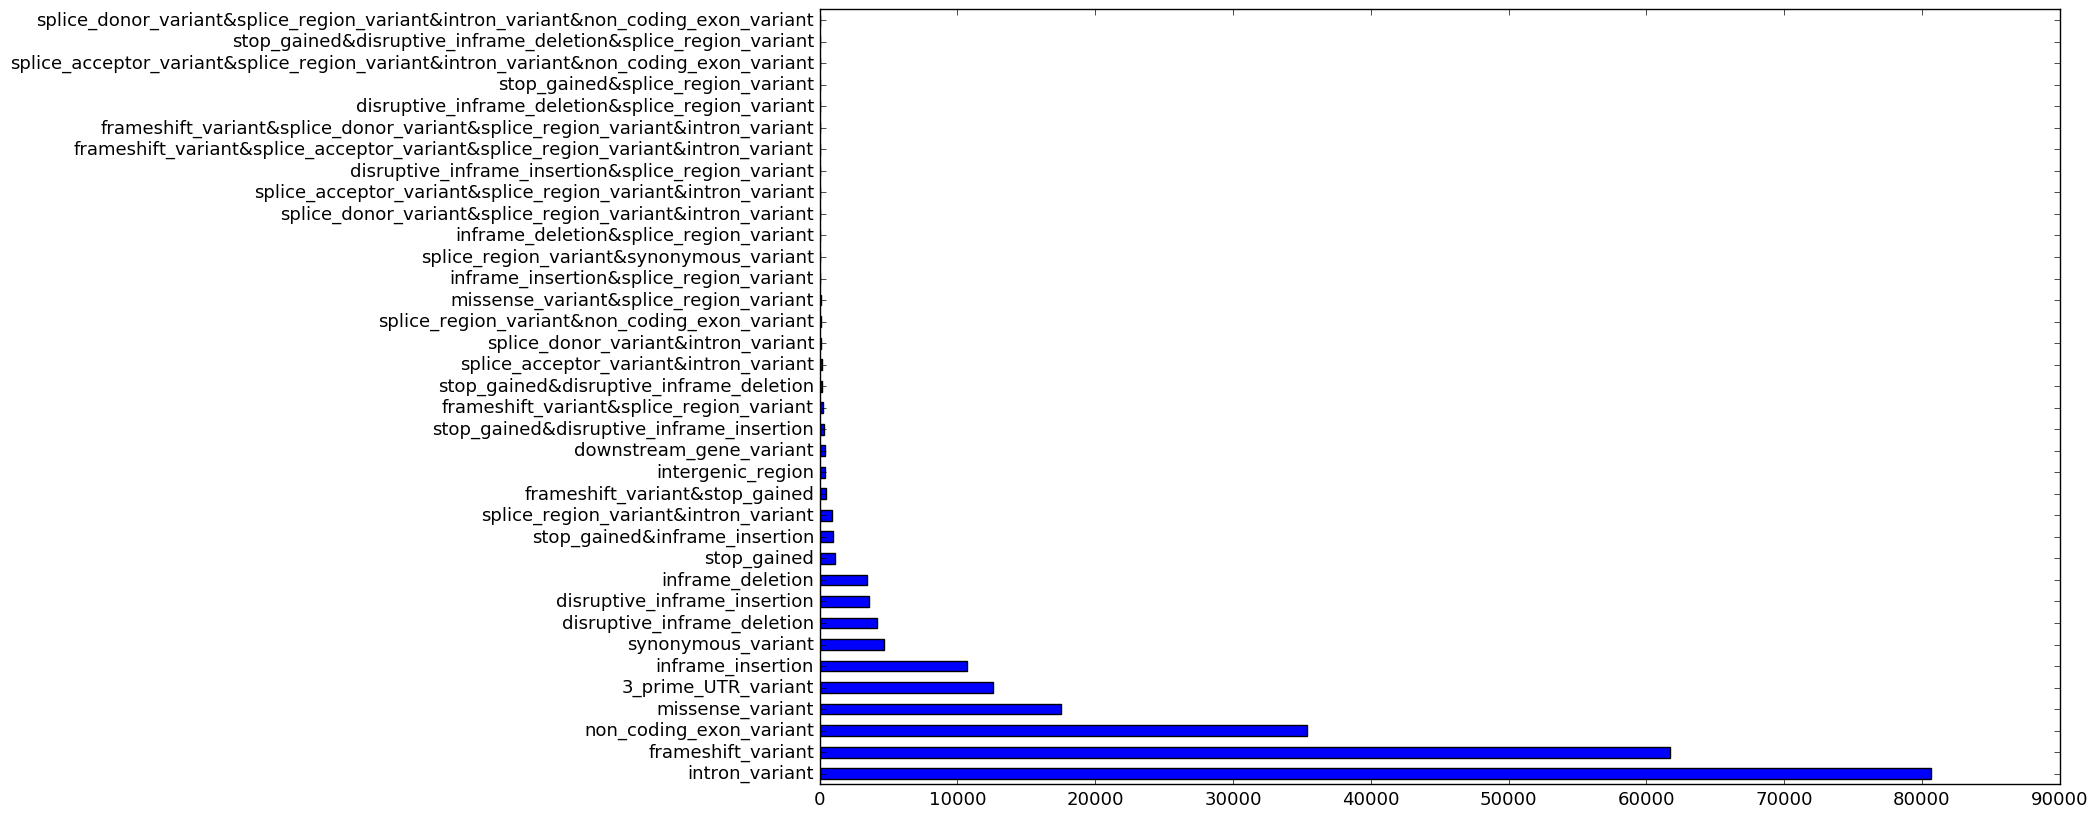

In [77]:
stat_effect=combo_df["Effect"].value_counts()
stat_effect.plot(kind="barh", fontsize=13, figsize=(16,10))

In [46]:
print combo_df["normalized_so"].value_counts()

intron_variant             80680
frameshift_variant         62395
ignored                    44657
nonsynonymous_variant      17515
inframe_variant            14149
3_prime_UTR_variant        12586
synonymous_variant          4688
stop_gained                 2598
downstream_gene_variant      420
splicing_variant             286
Name: normalized_so, dtype: int64


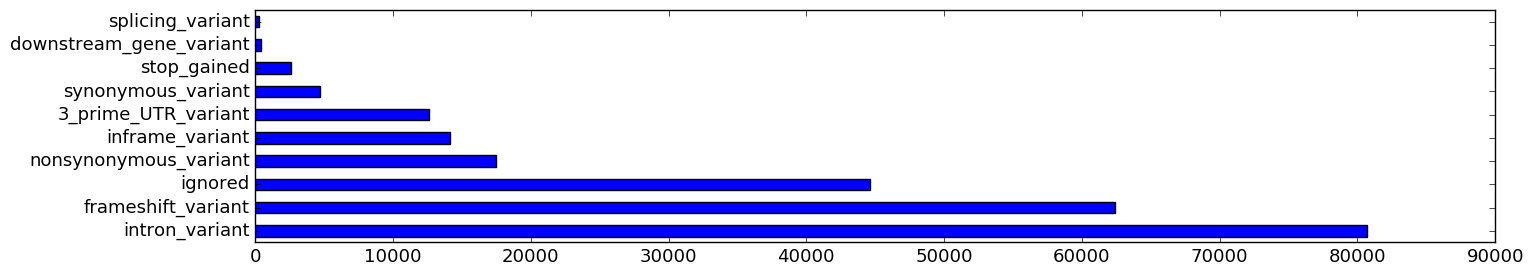

In [76]:
stat_normalized=combo_df["normalized_so"].value_counts()
stat_normalized.plot(kind="barh", fontsize=13, figsize=(16,3))

In [49]:
NM_007294=combo_df[combo_df['Feature_id'] == 'NM_007294.3']
NM_007294.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,...,Tracscript_biotype,Rank_total,HGVS.c,HGVS.p,cDNA_position,CDS_position,Protein_position,Distance_to_feature,Errors,normalized_so
0,chr17,41243351,.,A,G,.,.,ANN=G|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,10/22,c.4096+101T>C,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
1,chr17,41243351,.,A,C,.,.,ANN=C|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,10/22,c.4096+101T>G,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
2,chr17,41243351,.,A,T,.,.,ANN=T|intron_variant|MODIFIER|BRCA1|BRCA1|tran...,GT,0/1,...,protein_coding,10/22,c.4096+101T>A,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
3,chr17,41243351,.,A,AA,.,.,ANN=AA|intron_variant|MODIFIER|BRCA1|BRCA1|tra...,GT,0/1,...,protein_coding,10/22,c.4096+100_4096+101insT,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant
4,chr17,41243351,.,A,AG,.,.,ANN=AG|intron_variant|MODIFIER|BRCA1|BRCA1|tra...,GT,0/1,...,protein_coding,10/22,c.4096+100_4096+101insC,NaN,NaN,NaN,NaN,NaN,NaN,intron_variant


In [52]:
frameshift=combo_df[((combo_df['Feature_id'] == 'NM_007294.3') | (combo_df['Feature_id'] == 'NM_000059')) & (combo_df['normalized_so'] == 'frameshift_variant')].head()
frameshift.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,...,Tracscript_biotype,Rank_total,HGVS.c,HGVS.p,cDNA_position,CDS_position,Protein_position,Distance_to_feature,Errors,normalized_so
1385,chr17,41243449,.,TACC,T,.,.,ANN=T|frameshift_variant&splice_donor_variant&...,GT,0/1,...,protein_coding,10/23,c.4096_4096+2delGGT,p.Gly1366fs,NaN,4096/5592,1366/1863,NaN,NaN,frameshift_variant
1403,chr17,41243451,.,C,CA,.,.,ANN=CA|frameshift_variant&splice_region_varian...,GT,0/1,...,protein_coding,10/23,c.4096_4096+1insT,p.Gly1366fs,4328/7207,4096/5592,1366/1863,NaN,NaN,frameshift_variant
1404,chr17,41243451,.,C,CG,.,.,ANN=CG|frameshift_variant&splice_region_varian...,GT,0/1,...,protein_coding,10/23,c.4096_4096+1insC,p.Gly1366fs,4328/7207,4096/5592,1366/1863,NaN,NaN,frameshift_variant
1405,chr17,41243451,.,C,CC,.,.,ANN=CC|frameshift_variant&splice_region_varian...,GT,0/1,...,protein_coding,10/23,c.4096dupG,p.Glu1367fs,4328/7207,4096/5592,1366/1863,NaN,NaN,frameshift_variant
1406,chr17,41243451,.,C,CT,.,.,ANN=CT|frameshift_variant&splice_region_varian...,GT,0/1,...,protein_coding,10/23,c.4096_4096+1insA,p.Gly1366fs,4328/7207,4096/5592,1366/1863,NaN,NaN,frameshift_variant


In [60]:
frameshift.ix[1385]

#CHROM                                                             chr17
POS                                                             41243449
ID                                                                     .
REF                                                                 TACC
ALT                                                                    T
QUAL                                                                   .
FILTER                                                                 .
INFO                   ANN=T|frameshift_variant&splice_donor_variant&...
FORMAT                                                                GT
SAMPLE                                                               0/1
Allele                                                                 T
Effect                 frameshift_variant&splice_donor_variant&splice...
Putative_impact                                                     HIGH
Gene_name                                          